In [1]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display

# Set the seed value for experiment reproducibility.
seed = 7
tf.random.set_seed(seed)
np.random.seed(seed)

In [2]:
DATASET_PATH = 'gender/classification'
DATASET_PATH2 = 'gender/classification/male'
DATASET_PATH3 = 'gender/classification/female'

TESTSET_PATH = 'data/testset'

data_dir = pathlib.Path(DATASET_PATH)
data_dir2 = pathlib.Path(DATASET_PATH2)
data_dir3 = pathlib.Path(DATASET_PATH3)

test_dir = pathlib.Path(TESTSET_PATH)

'\nif not data_dir.exists():\n    tf.keras.utils.get_file(\n      \'mini_speech_commands.zip\',\n      origin="http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip",\n      extract=True,\n      cache_dir=\'.\', cache_subdir=\'data\')\n'

In [3]:
commands = np.array(tf.io.gfile.listdir(str(data_dir)))
commands = commands[commands != 'README.md']
print('Commands:', commands)

Commands: ['female' 'male']


In [4]:
filenames = tf.io.gfile.glob(str(data_dir) + '/*/*')
maledata = tf.io.gfile.glob(str(data_dir2) + '/*')
femaledata = tf.io.gfile.glob(str(data_dir3) + '/*')
#valnames = tf.io.gfile.glob(str(val_dir) + '/*/*')
#testnames = tf.io.gfile.glob(str(test_dir) + '/*/*')

filenames = tf.random.shuffle(filenames)
maledata= tf.random.shuffle(maledata)
femaledata = tf.random.shuffle(femaledata)

num_samples = len(filenames)
num_samples2 = len(maledata)
num_samples3 = len(femaledata)


print(str(data_dir) + '/*/*')

print('Number of total examples:', num_samples)
print('Male of total examples:', num_samples2)
print('Female of total examples:', num_samples3)

gender\classification/*/*
Number of total examples: 384
Male of total examples: 317
Female of total examples: 67


In [5]:
train_files = filenames[:-76]
val_files = filenames[-76:-38]
test_files = filenames[-38:]

'''
train_files = filenames[:]
val_files = valnames[:]
test_files = testnames[:]
'''
print('Training set size', len(train_files))
print('Validation set size', len(val_files))
print('Test set size', len(test_files))

Training set size 308
Validation set size 38
Test set size 38


In [6]:
test_file = tf.io.read_file(DATASET_PATH+'/male/pkdhPdrive1.csv.wav')
test_audio, _ = tf.audio.decode_wav(contents=test_file)
test_audio.shape

TensorShape([16004, 1])

In [7]:
#hide

In [8]:
#hide

In [9]:
#hide

In [10]:
#hide

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Tensor("strided_slice:0", shape=(), dtype=string)


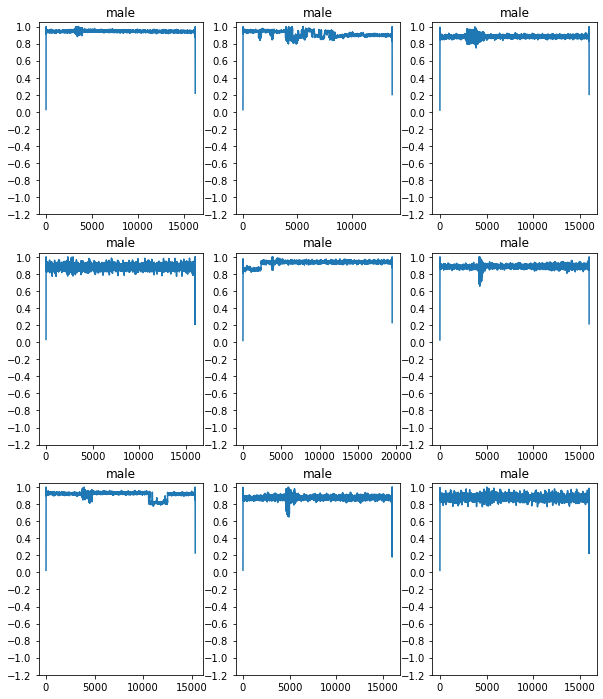

In [11]:
#hide

In [12]:
#hide

In [13]:
#hide

Label: male
Waveform shape: (16260,)
Spectrogram shape: (247, 129, 1)
Audio playback


In [14]:
#hide

C:\Users\Won_Research\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  del sys.path[0]


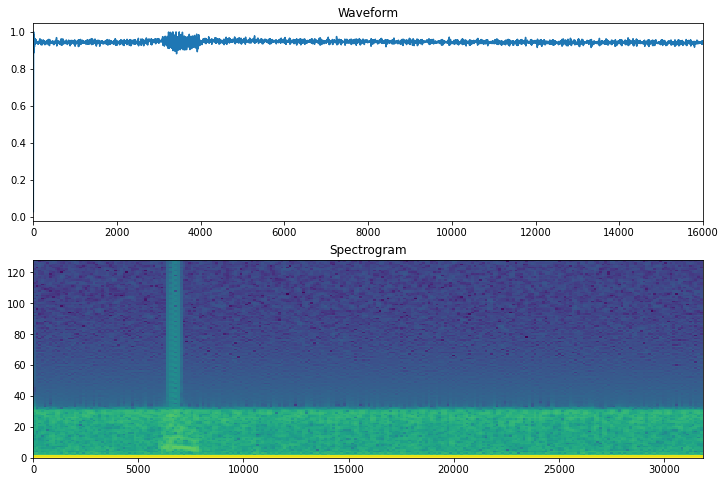

In [15]:
#hide

In [16]:
#hide

In [17]:
spectrogram_ds = waveform_ds.map(
  map_func=get_spectrogram_and_label_id,
  num_parallel_calls=AUTOTUNE)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


C:\Users\Won_Research\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  del sys.path[0]


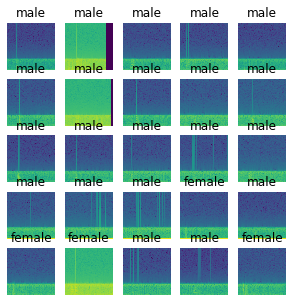

In [18]:
#hide

In [19]:
#hide

In [20]:
train_ds = spectrogram_ds
val_ds = preprocess_dataset(val_files)
test_ds = preprocess_dataset(test_files)

Tensor("strided_slice:0", shape=(), dtype=string)
Tensor("strided_slice:0", shape=(), dtype=string)


In [21]:
batch_size = 64 # 64
train_ds = train_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)

In [22]:
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)

In [23]:
for spectrogram, _ in spectrogram_ds.take(1):
    input_shape = spectrogram.shape
print('Input shape:', input_shape)
num_labels = len(commands)

# Instantiate the `tf.keras.layers.Normalization` layer.

norm_layer = layers.Normalization()

# Fit the state of the layer to the spectrograms
# with `Normalization.adapt`.

norm_layer.adapt(data=spectrogram_ds.map(map_func=lambda spec, label: spec))

model = models.Sequential([
    layers.Input(shape=input_shape),
    # Downsample the input.
    layers.Resizing(32,32),
    # Normalize.
    norm_layer,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(num_labels),
])

model.summary()

Input shape: (247, 129, 1)
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow tea

In [24]:
model.compile(
    optimizer='adam',# tf.keras.optimizers.Adam(),
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [25]:
EPOCHS = 100
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=50),
)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - ETA: 0s - loss: 0.5435 - accuracy: 0.7370 WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000019DE9286048> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) 

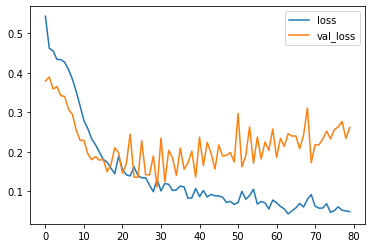

In [26]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'] , metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [27]:
test_audio = []
test_labels = []

for audio, label in test_ds:
    test_audio.append(audio.numpy())
    test_labels.append(label.numpy())

test_audio = np.array(test_audio)
test_labels = np.array(test_labels)

In [28]:
y_pred = np.argmax(model.predict(test_audio), axis=1)
y_true = test_labels

test_acc = sum(y_pred == y_true) / len(y_true)
print(f'Test set accuracy: {test_acc:.0%}')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Test set accuracy: 97%


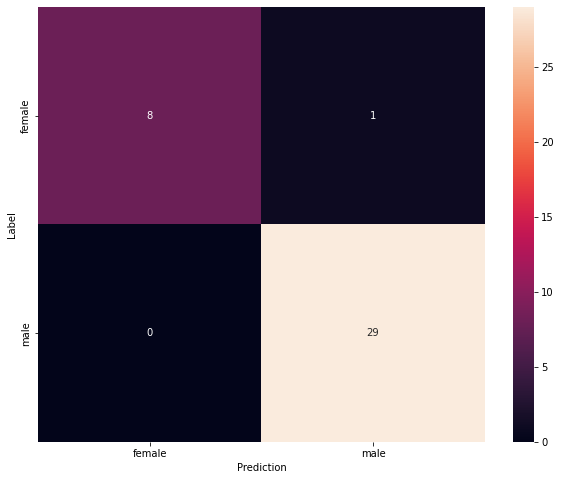

5/5 [==============================] - 0s 5ms/step - loss: 0.0305 - accuracy: 0.9870


[0.030471764504909515, 0.9870129823684692]

In [29]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=commands,
            yticklabels=commands,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

model.evaluate(train_ds, batch_size= 16)

Tensor("strided_slice:0", shape=(), dtype=string)


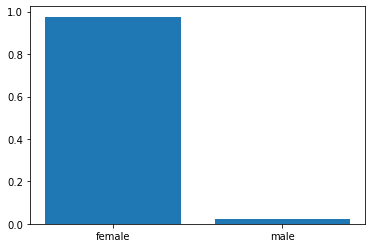

pre2 :  0 [[ 1.9210916 -1.7913275]]
pre1 :  0 [[ 1.9210916 -1.7913275]]
female


In [30]:
sample_file = test_dir/'result/plhg2Pclose5.csv.wav'

sample_ds = preprocess_dataset([str(sample_file)])

for spectrogram, label in sample_ds.batch(1):
    prediction2 = model.predict(spectrogram)

    plt.bar(commands, tf.nn.softmax(prediction2[0]))
    plt.show()

prediction = model.predict(spectrogram,batch_size = 64)
print("pre2 : ",np.argmax(prediction2),prediction2)
print("pre1 : ",np.argmax(prediction),prediction)

'''

#DATASET_PATH = 'data/mini_speech_commands'
#VALSET_PATH = 'data/val'
#TESTSET_PATH = 'data/testset'

#data_dir = pathlib.Path(DATASET_PATH)
#val_dir = pathlib.Path(VALSET_PATH)
#test_dir = pathlib.Path(TESTSET_PATH)

PRE_PATH = 'result/'
presamplePath = pathlib.Path(PRE_PATH)
#filenames = tf.io.gfile.glob(str(data_dir) + '/*/*')
presample = tf.io.gfile.glob(str(presamplePath) + '/*/*')

sample_file = presamplePath/'close/newdatasetPwindowup4.csv.wav'
sample_ds = preprocess_dataset([str(sample_file)])

print(sample_ds)

sample_ds = preprocess_dataset([str(sample_file)])
for spectrogram, label in sample_ds.batch(1):
    prediction = model.predict(sample_file)
    plt.bar(commands, tf.nn.softmax(prediction[0]))
    plt.title(f'Predictions for "{commands[label[0]]}"')
    plt.show()

print(commands)
print(prediction)

'''
if np.argmax(prediction) == 0:
    print("female")
elif np.argmax(prediction) == 1:
    print("male")

In [31]:
from keras.models import load_model

model.save('genderclassification.h5')

In [32]:
#hide

<function get_label at 0x0000019C479574C8>


In [33]:
#hide

['female' 'male']
